# HMI

In [ ]:
import os
import glob
import numpy as np
from sunpy.map import Map
import matplotlib.pyplot as plt
from astropy import units as u

In [ ]:
input_path = '01_input/AR7115_20170906_090000'

In [ ]:
hmi_p = glob.glob(os.path.join(input_path, 'hmi/*Bp.fits'))[0]
hmi_t = glob.glob(os.path.join(input_path, 'hmi/*Bt.fits'))[0]
hmi_r = glob.glob(os.path.join(input_path, 'hmi/*Br.fits'))[0]

In [ ]:
p_map, t_map, r_map = Map(hmi_p), Map(hmi_t), Map(hmi_r)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


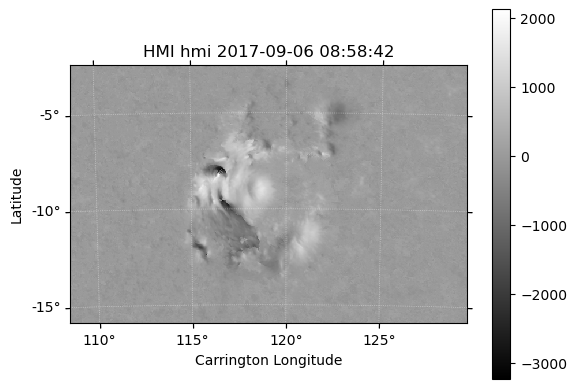

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


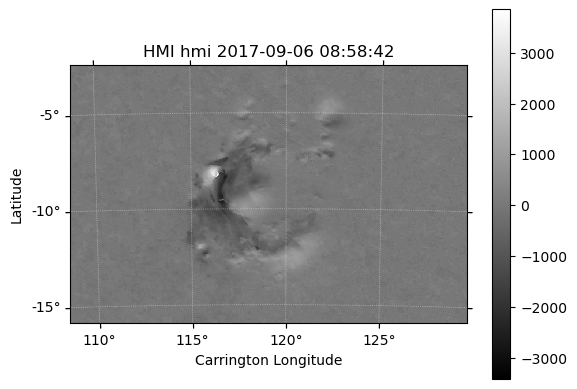

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


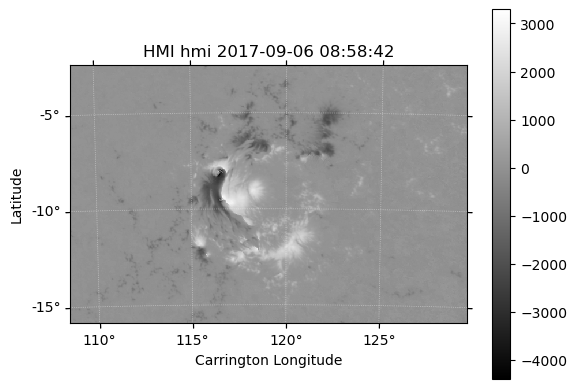

(None, None, None)

In [ ]:
p_map.peek(), t_map.peek(), r_map.peek()

## Binning -> b_bottom

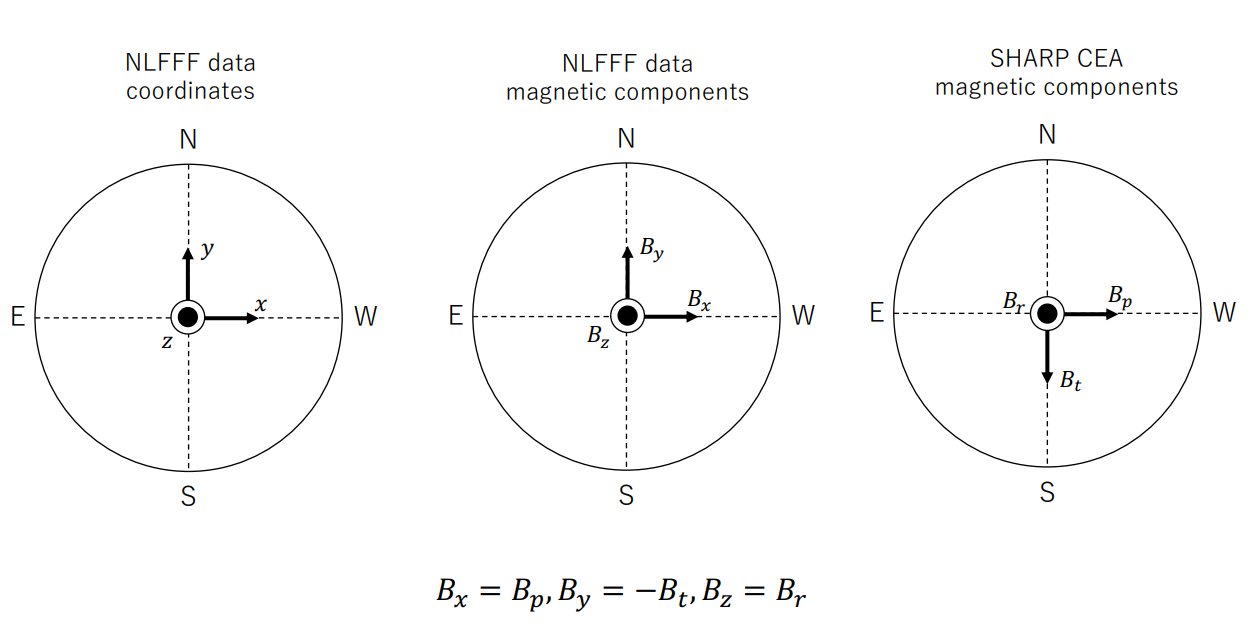

In [ ]:
maps = [p_map, t_map, r_map]
B_hmi = np.stack([maps[0].data, -maps[1].data, maps[2].data]).transpose()
B_hmi.shape

(688, 448, 3)

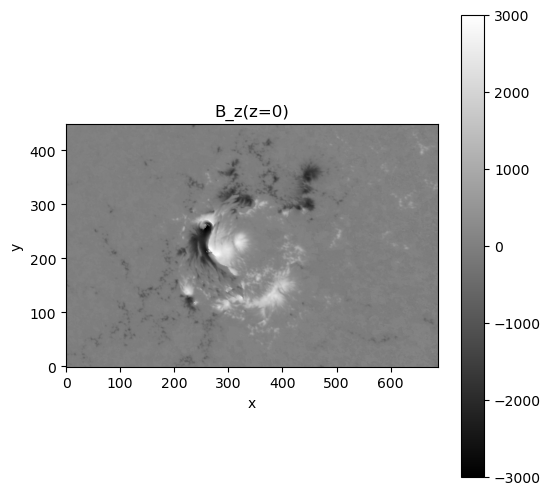

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(B_hmi[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
bin = 2
maps_binned = [m.superpixel(u.Quantity((bin, bin), u.pixel), func=np.mean) for m in maps]
B_binned = np.stack([maps_binned[0].data, -maps_binned[1].data, maps_binned[2].data]).transpose()
B_binned.shape

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


(344, 224, 3)

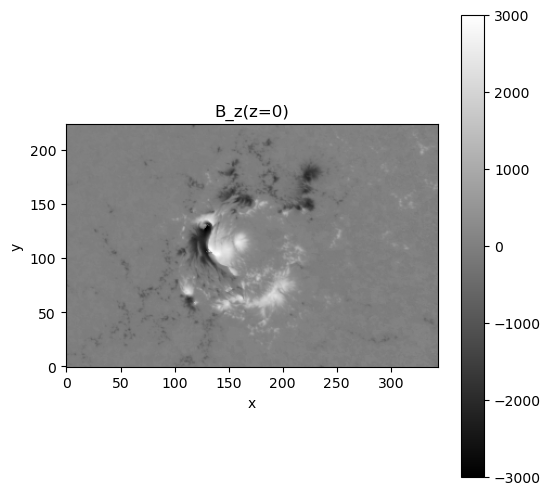

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(B_binned[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
b_bottom = np.array(B_binned)

In [ ]:
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

In [ ]:
with open(bottom_npy_path, 'wb') as f:
        np.save(f, b_bottom)

## EUV

In [ ]:
aia_94_path = glob.glob(os.path.join(input_path, 'euv/aia*.fits'))[0]

In [ ]:
def aia_94(aia_94_path, ref_wcs):
    aia_94_map = Map(aia_94_path)
    aia_94_map.peek()
    obstime = aia_94_map.observer_coordinate.obstime
    obstime.format = 'iso'
    aia_94_repro_map = aia_94_map.reproject_to(ref_wcs)

    fig = plt.figure()
    ax = fig.add_subplot(projection=aia_94_repro_map)
    aia_94_repro_map.plot(axes=ax)
    plt.colorbar()
    plt.title(f"AIA 94 Å {obstime.value}")
    plt.show()

In [ ]:
ref_wcs = r_map.wcs
ref_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'CRLN-CEA'  'CRLT-CEA'  
CRVAL : 119.078156  -9.24354935  
CRPIX : 344.5  224.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0299999993  0.0299999993  
NAXIS : 688  448

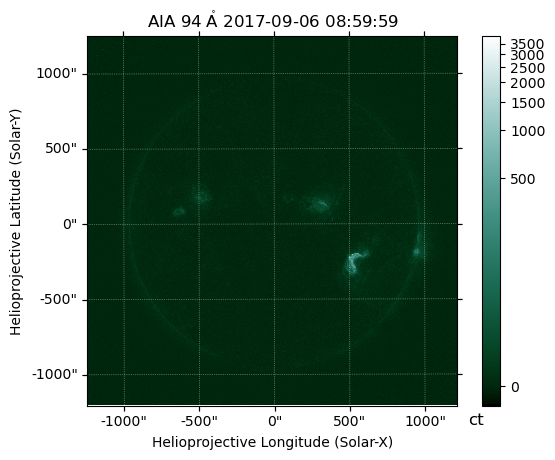

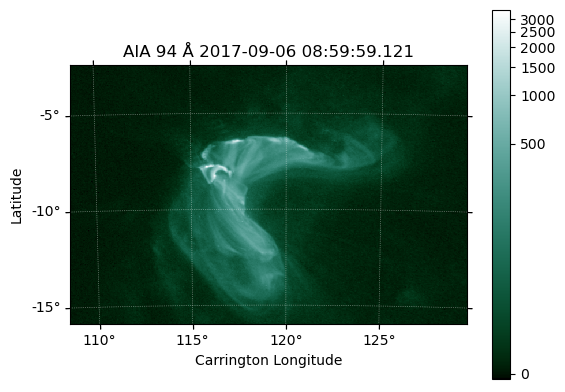

In [ ]:
aia_94(aia_94_path, ref_wcs)